# ***Análise exploratória a repeito de dados sobre resíduos plasticos no mundo e no Brasil***

**Dados disponíveis em**: https://www.kaggle.com/datasets/sohamgade/plastic-datasets

**Importanto bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')
sns.set()

**Datasets utilizados**:
* global-plastics-production.csv;
* mismanaged-waste-global-total.csv


# **Análise exploratória da produção global de plástico ao longo do tempo (1950 até 2015)**

**Importando global-plastics-production (gpp)**

In [ ]:
gpp = pd.read_csv("global-plastics-production.csv")

In [ ]:
gpp.head()

,Entity,Code,Year,Global plastics production (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000


In [ ]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Entity                                       66 non-null     object
 1   Code                                         66 non-null     object
 2   Year                                         66 non-null     int64 
 3   Global plastics production (million tonnes)  66 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


In [ ]:
gpp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,66.0,1.982500e+03,1.919635e+01,1950.0,1966.25,1982.5,1.998750e+03,2015.0
Global plastics production (million tonnes),66.0,1.185303e+08,1.126182e+08,2000000.0,20750000.00,76500000.0,1.985000e+08,381000000.0


In [ ]:
gpp.shape

(66, 4)

In [ ]:
print("O dataset se extende entre os anos {} a {}.".format(min(gpp.Year),max(gpp.Year)))

O dataset se extende entre os anos 1950 a 2015.


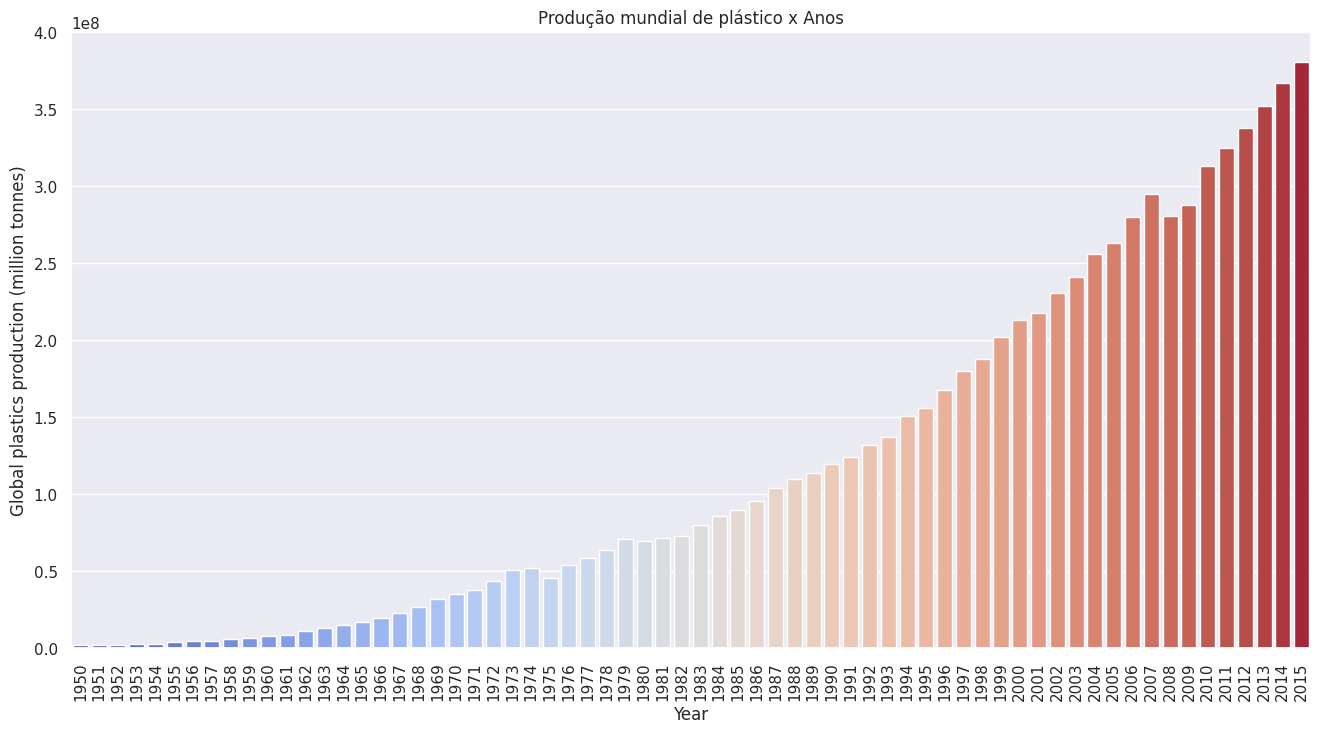

In [ ]:
palette = sns.color_palette("coolwarm", len(gpp))

plt.figure(figsize=(16,8))
sns.barplot(x=gpp['Year'], y=gpp['Global plastics production (million tonnes)'], palette=palette)
plt.title("Produção mundial de plástico x Anos")
plt.xticks(rotation=90)
plt.show()

**Conclusão**:
A produção global de plástico está aumentando constantemente ao longo desses anos, apresentando tendencia de continuidade. O mundo produz quatro vezes mais plásticos do que há quatro décadas.

# **Análise exploratória Mismanaged Waste Global Total**

**Importando mismanaged-waste-global-total (mwgt)**

In [ ]:
mwgt = pd.read_csv("mismanaged-waste-global-total.csv")

In [ ]:
mwgt.head()

,Entity,Code,Year,Mismanaged waste (% global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039


In [ ]:
mwgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             186 non-null    object 
 1   Code                               186 non-null    object 
 2   Year                               186 non-null    int64  
 3   Mismanaged waste (% global total)  186 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


In [ ]:
mwgt.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,186.0,2010.000000,0.000000,2010.0,2010.00000,2010.0000,2010.000000,2010.0000
Mismanaged waste (% global total),186.0,0.537634,2.298779,0.0,0.00685,0.0502,0.208175,27.6966


In [ ]:
len(mwgt['Entity'].unique())

186

Entity = 186 implica que cada país é mencionado uma única vez

In [ ]:
mwgt['Year'].value_counts()

Year
2010    186
Name: count, dtype: int64

Possuimos dados apenas do ano 2010

In [ ]:
sum = 0
for i in mwgt['Mismanaged waste (% global total)']:
    sum += i
print(round(sum))

100


**Qual país teve o máximo e o mínimo de resíduos mal gerenciados no ano de 2010?**

In [ ]:
mwgt[mwgt['Mismanaged waste (% global total)'] == max(mwgt['Mismanaged waste (% global total)'])]

,Entity,Code,Year,Mismanaged waste (% global total)
28,China,CHN,2010,27.6966


O Máximo de resíduos mal gerenciados foi feito pela China em 2010

In [ ]:
mwgt[mwgt['Mismanaged waste (% global total)'] == min(mwgt['Mismanaged waste (% global total)'])]

,Entity,Code,Year,Mismanaged waste (% global total)
29,Christmas Island,CXR,2010,0.0
30,Cocos Islands,CCK,2010,0.0
53,Falkland Islands,FLK,2010,0.0
122,Niue,NIU,2010,0.0
145,Saint Pierre and Miquelon,SPM,2010,0.0


Temos 5 países que quase não administraram mal nenhum resíduo em 2010

**Qual é a porcentagem de resíduos mal gerenciados pelo Brasil em 2010?**

In [ ]:
mwgt[mwgt["Entity"] == "Brazil"]

,Entity,Code,Year,Mismanaged waste (% global total)
17,Brazil,BRA,2010,1.4804


In [ ]:
mwgt[mwgt["Code"] == "USA"]

,Entity,Code,Year,Mismanaged waste (% global total)
180,United States,USA,2010,0.8649


Os EUA Lidaram melhor com a questão dos resíduos

**Criando mapa de calor mundial da gestão de resíduos**

Solução para o geopandas caso aponte a necessidade de alguma instalação: https://geoffboeing.com/2014/09/using-geopandas-windows/

* !pip install geopandas
* !pip install mapclassify
* !pip install fiona shapely pyproj rtree

In [ ]:
!pip install mapclassify

In [ ]:
import geopandas as gpd

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.columns=['pop_est', 'Continent', 'Entity', 'Code', 'gdp_md_est', 'geometry']
world.head()

,pop_est,Continent,Entity,Code,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


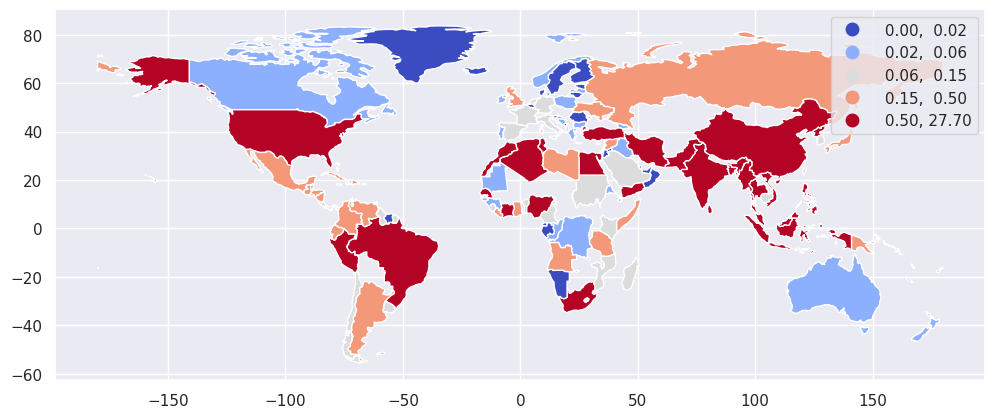

In [ ]:
merge=pd.merge(world, mwgt,on='Code')
merge.plot(column="Mismanaged waste (% global total)", scheme="quantiles", legend=True, figsize=(12, 10),cmap='coolwarm');

Possuimos países faltantes no mapa, porém é possível encontrar quais são os principais países que tem resíduos mal gerenciados.

# **Análise exploratória Per Capita Mismanaged Plastic Waste VS GDP Per Capita**

In [ ]:
mpw_gdp = pd.read_csv("per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv")

In [ ]:
mpw_gdp.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [ ]:
mpw_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita mismanaged plastic waste                  186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [ ]:
mpw_gdp.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita mismanaged plastic waste                    47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [ ]:
mpw_gdp.shape

(48168, 7)

In [ ]:
mpw_gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,48168.0,1.903147e+03,3.157168e+02,-10000.00000,1859.000000,1.920000e+03,1.975000e+03,2.019000e+03
Per capita mismanaged plastic waste,186.0,4.522581e-02,5.007705e-02,0.00100,0.006000,3.200000e-02,6.600000e-02,2.990000e-01
"GDP per capita, PPP (constant 2011 international $)",6407.0,1.492610e+04,1.773975e+04,247.43654,3021.071807,8.447264e+03,1.960754e+04,1.353188e+05
"Total population (Gapminder, HYDE & UN)",46883.0,2.982790e+07,2.530860e+08,905.00000,201733.500000,1.542937e+06,5.886795e+06,7.713468e+09


In [ ]:
min(mpw_gdp['Year'])

-10000

O dataset possui alguns valores negativos que precisam ser removidos, pois não correspondem a etiqueta da coluna

In [ ]:
mpw_gdp['Continent'].value_counts()

Continent
Europe           75
Asia             62
Africa           61
North America    42
Oceania          26
South America    15
Antarctica        4
Name: count, dtype: int64

Todos os continentes estão representados no dataset

obs.: não podemos utilizar dropna para remover valores nulos, uma vez que isso removeria todas as linhas do dataset.

**Lidando com anos menores que zero**

In [ ]:
mpw_gdp[mpw_gdp['Year']<0]

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
221,Africa,NaN,-10000,NaN,NaN,241901.0,NaN
222,Africa,NaN,-9000,NaN,NaN,342782.0,NaN
223,Africa,NaN,-8000,NaN,NaN,490284.0,NaN
224,Africa,NaN,-7000,NaN,NaN,707844.0,NaN
225,Africa,NaN,-6000,NaN,NaN,1031529.0,NaN
...,...,...,...,...,...,...,...
47384,World,OWID_WRL,-5000,NaN,NaN,17920172.0,NaN
47385,World,OWID_WRL,-4000,NaN,NaN,28370428.0,NaN
47386,World,OWID_WRL,-3000,NaN,NaN,44819892.0,NaN
47387,World,OWID_WRL,-2000,NaN,NaN,72108128.0,NaN


In [ ]:
mpw_gdp.shape

(48168, 7)

In [ ]:
new_mpw_gdp = mpw_gdp[mpw_gdp['Year']>0]
new_mpw_gdp.shape

(48092, 7)

In [ ]:
new_mpw_gdp[new_mpw_gdp['Year']<0]

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent


**Em qual continente o PIB por pessoa é o mais alto e o mais baixo em 2011?**

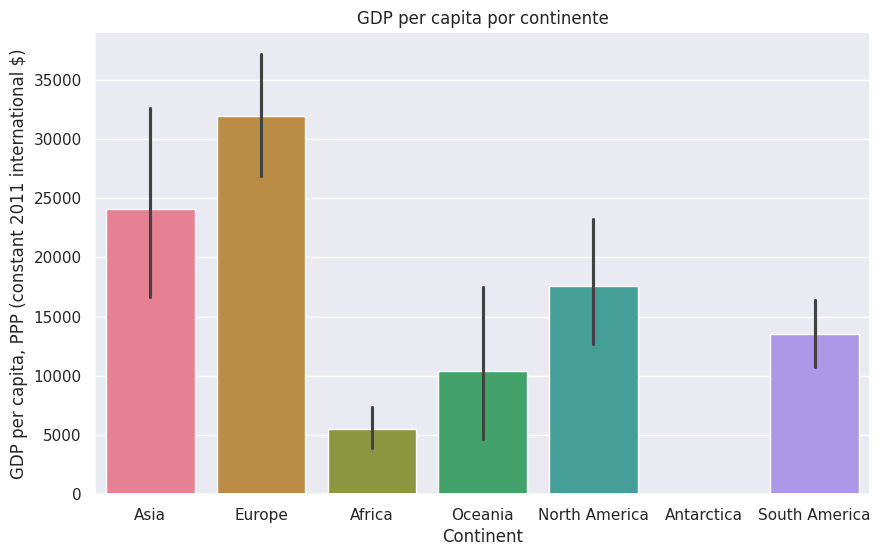

In [ ]:
palette = sns.color_palette("husl", len(new_mpw_gdp['Continent'].unique()))

plt.figure(figsize=(10,6))
sns.barplot(x=new_mpw_gdp['Continent'], y=new_mpw_gdp['GDP per capita, PPP (constant 2011 international $)'], palette=palette)
plt.title("GDP per capita por continente")
plt.show()

**Em que continente o desperdício de plástico mal gerido é maior e menor por pessoa?**

In [ ]:
new_mpw_gdp.shape[0] - new_mpw_gdp['Per capita mismanaged plastic waste'].isnull().sum()

186

In [ ]:
new_df = new_mpw_gdp[new_mpw_gdp['Per capita mismanaged plastic waste'].notna()]
new_df.isnull().sum()

Entity                                                   0
Code                                                     0
Year                                                     0
Per capita mismanaged plastic waste                      0
GDP per capita, PPP (constant 2011 international $)     38
Total population (Gapminder, HYDE & UN)                  5
Continent                                              186
dtype: int64

# **Análise exploratória Per Capita Plastic Waste VS GDP Per Capita**

In [ ]:
pcpw_gdp = pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv")
pcpw_gdp.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [ ]:
pcpw_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [ ]:
pcpw_gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,48168.0,1.903147e+03,3.157168e+02,-10000.00000,1859.000000,1.920000e+03,1.975000e+03,2.019000e+03
Per capita plastic waste (kg/person/day),186.0,1.798118e-01,1.230064e-01,0.01000,0.103000,1.440000e-01,2.520000e-01,6.860000e-01
"GDP per capita, PPP (constant 2011 international $)",6407.0,1.492610e+04,1.773975e+04,247.43654,3021.071807,8.447264e+03,1.960754e+04,1.353188e+05
"Total population (Gapminder, HYDE & UN)",46883.0,2.982790e+07,2.530860e+08,905.00000,201733.500000,1.542937e+06,5.886795e+06,7.713468e+09


# **Análise exploratória plastic waste per capita**

In [ ]:
pwpc = pd.read_csv("plastic-waste-per-capita.csv")
pwpc.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day)
0,Albania,ALB,2010,0.069
1,Algeria,DZA,2010,0.144
2,Angola,AGO,2010,0.062
3,Anguilla,AIA,2010,0.252
4,Antigua and Barbuda,ATG,2010,0.660


In [ ]:
pwpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    186 non-null    object 
 1   Code                                      186 non-null    object 
 2   Year                                      186 non-null    int64  
 3   Per capita plastic waste (kg/person/day)  186 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


In [ ]:
pwpc.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,186.0,2010.000000,0.000000,2010.00,2010.000,2010.000,2010.000,2010.000
Per capita plastic waste (kg/person/day),186.0,0.179812,0.123006,0.01,0.103,0.144,0.252,0.686


**Em 2010, em que país por pessoa o desperdício de plástico é mais elevado e mais baixo?**

In [ ]:
pwpc[pwpc['Per capita plastic waste (kg/person/day)'] == max(pwpc['Per capita plastic waste (kg/person/day)'])]

,Entity,Code,Year,Per capita plastic waste (kg/person/day)
91,Kuwait,KWT,2010,0.686


In [ ]:
pwpc[pwpc['Per capita plastic waste (kg/person/day)'] == min(pwpc['Per capita plastic waste (kg/person/day)'])]

,Entity,Code,Year,Per capita plastic waste (kg/person/day)
79,India,IND,2010,0.01


In [ ]:
max_plastic_waste_brazil = pwpc[(pwpc['Entity'] == 'Brazil') & (pwpc['Per capita plastic waste (kg/person/day)'] == pwpc[pwpc['Entity'] == 'Brazil']['Per capita plastic waste (kg/person/day)'].max())]

In [ ]:
max_plastic_waste_brazil

,Entity,Code,Year,Per capita plastic waste (kg/person/day)
17,Brazil,BRA,2010,0.165


Assim, o Kuwait tem o maior desperdício por pessoa e a Índia tem o menor em 2010. O Brasil possui cinco vezes menos o valor do Kuwait.

# **Depois de analisar todos os conjuntos de dados, podemos mesclar todos em bases de 2015**

In [ ]:
merged_df = pd.merge(pwpc,mwgt, on = "Code")
merged_df.head()

,Entity_x,Code,Year_x,Per capita plastic waste (kg/person/day),Entity_y,Year_y,Mismanaged waste (% global total)
0,Albania,ALB,2010,0.069,Albania,2010,0.0933
1,Algeria,DZA,2010,0.144,Algeria,2010,1.6347
2,Angola,AGO,2010,0.062,Angola,2010,0.1964
3,Anguilla,AIA,2010,0.252,Anguilla,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.660,Antigua and Barbuda,2010,0.0039


In [ ]:
merged_df.drop(["Entity_y","Year_y"],axis=1,inplace=True)
merged_df.head()

,Entity_x,Code,Year_x,Per capita plastic waste (kg/person/day),Mismanaged waste (% global total)
0,Albania,ALB,2010,0.069,0.0933
1,Algeria,DZA,2010,0.144,1.6347
2,Angola,AGO,2010,0.062,0.1964
3,Anguilla,AIA,2010,0.252,0.0002
4,Antigua and Barbuda,ATG,2010,0.660,0.0039


In [ ]:
merged_df.isnull().sum()

Entity_x                                    0
Code                                        0
Year_x                                      0
Per capita plastic waste (kg/person/day)    0
Mismanaged waste (% global total)           0
dtype: int64

In [ ]:
merged_df.rename(columns={"Entity_x":"Entity","Year_x":"Year"},inplace=True)
merged_df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),Mismanaged waste (% global total)
0,Albania,ALB,2010,0.069,0.0933
1,Algeria,DZA,2010,0.144,1.6347
2,Angola,AGO,2010,0.062,0.1964
3,Anguilla,AIA,2010,0.252,0.0002
4,Antigua and Barbuda,ATG,2010,0.660,0.0039


In [ ]:
pcpw_gdp.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [ ]:
#dropando valores nulos de Per Capita Plastic Waste VS GDP Per Capita dataset
df = pcpw_gdp[pcpw_gdp['GDP per capita, PPP (constant 2011 international $)'].notna() &
              pcpw_gdp['Total population (Gapminder, HYDE & UN)'].notna()]
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [ ]:
df = df[df['Year'] == 2015]
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,34414000.0,Asia
369,Albania,ALB,2015,NaN,10970.452245,2891000.0,Europe
589,Algeria,DZA,2015,NaN,13724.723853,39728000.0,Africa
1099,Angola,AGO,2015,NaN,6227.664689,27884000.0,Africa
1390,Antigua and Barbuda,ATG,2015,NaN,20154.947488,94000.0,North America


In [ ]:
df.drop(columns=['Per capita plastic waste (kg/person/day)','Continent'], inplace=True)

In [ ]:
df.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
14,Afghanistan,AFG,2015,1809.016488,34414000.0
369,Albania,ALB,2015,10970.452245,2891000.0
589,Algeria,DZA,2015,13724.723853,39728000.0
1099,Angola,AGO,2015,6227.664689,27884000.0
1390,Antigua and Barbuda,ATG,2015,20154.947488,94000.0


In [ ]:
df.shape

(189, 5)

In [ ]:
#merge final
final_merge = pd.merge(merged_df, df, on="Code")
final_merge.head()

,Entity_x,Code,Year_x,Per capita plastic waste (kg/person/day),Mismanaged waste (% global total),Entity_y,Year_y,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
0,Albania,ALB,2010,0.069,0.0933,Albania,2015,10970.452245,2891000.0
1,Algeria,DZA,2010,0.144,1.6347,Algeria,2015,13724.723853,39728000.0
2,Angola,AGO,2010,0.062,0.1964,Angola,2015,6227.664689,27884000.0
3,Antigua and Barbuda,ATG,2010,0.660,0.0039,Antigua and Barbuda,2015,20154.947488,94000.0
4,Argentina,ARG,2010,0.183,0.4955,Argentina,2015,19116.907915,43075000.0


In [ ]:
final_merge.rename(columns={"Entity_x":"Entity","Year_x":"Year",
                            "Per capita plastic waste (kg/person/day)":"Plastic waste per Person(kg/day)",
                           "GDP per capita, PPP (constant 2011 international $)": "GDP per capita in PPP",
                           "Total population (Gapminder, HYDE & UN)":"Total population"},inplace=True)
final_merge.drop(columns=["Entity_y","Year_y"],inplace=True)
final_merge.head()

,Entity,Code,Year,Plastic waste per Person(kg/day),Mismanaged waste (% global total),GDP per capita in PPP,Total population
0,Albania,ALB,2010,0.069,0.0933,10970.452245,2891000.0
1,Algeria,DZA,2010,0.144,1.6347,13724.723853,39728000.0
2,Angola,AGO,2010,0.062,0.1964,6227.664689,27884000.0
3,Antigua and Barbuda,ATG,2010,0.660,0.0039,20154.947488,94000.0
4,Argentina,ARG,2010,0.183,0.4955,19116.907915,43075000.0


In [ ]:
final_merge.isnull().sum()

Entity                               0
Code                                 0
Year                                 0
Plastic waste per Person(kg/day)     0
Mismanaged waste (% global total)    0
GDP per capita in PPP                0
Total population                     0
dtype: int64

In [ ]:
final_merge.shape

(145, 7)

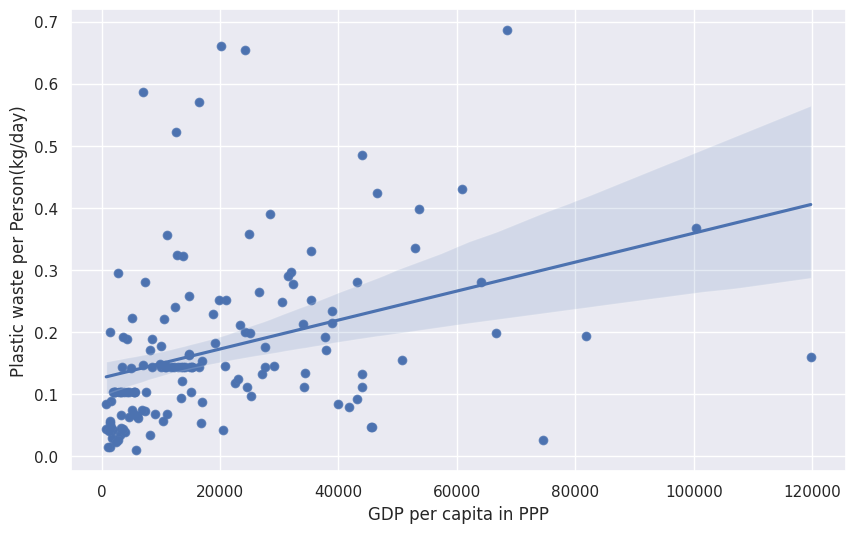

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=final_merge['Plastic waste per Person(kg/day)'],x=final_merge['GDP per capita in PPP'])
sns.regplot(y=final_merge['Plastic waste per Person(kg/day)'],x=final_merge['GDP per capita in PPP'])
plt.show()

É relevante apontar que à medida que o PIB por pessoa aumenta, os resíduos de plástico por pessoa também aumentam.